In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('../input/financial-fraud-transaction-detection/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## ****It is clear from above information that this dataset is an imbalanced dataset***

## ****Identyfying which type of trasanction is most or least***

In [7]:
type_value_counts = df['type'].value_counts()
type_value_counts

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
type_value_counts.index

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

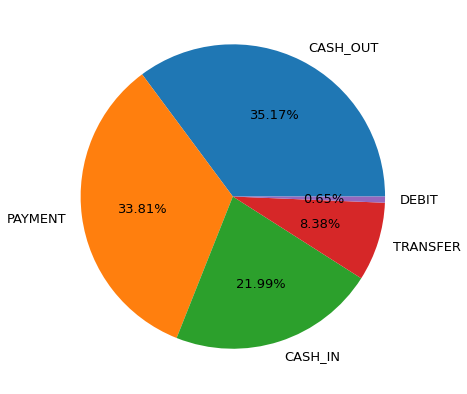

In [9]:
figure(figsize = (7,7))
textprops = {"fontsize":13}
plt.pie(type_value_counts, labels = ['CASH_OUT','PAYMENT','CASH_IN', 'TRANSFER', 'DEBIT'], autopct = '%1.2f%%', 
        textprops = textprops)
plt.show

## ****Conclusion*** :- 
#### ***It is evident from the above pieplot that CASH_OUT transaction is most & DEBIT transaction is least***

## ****Identyfying which type of trasanction involves maximum or minimum amount transfer***

In [10]:
type_Vs_amount = df.groupby('type')['amount'].sum()
type_Vs_amount

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

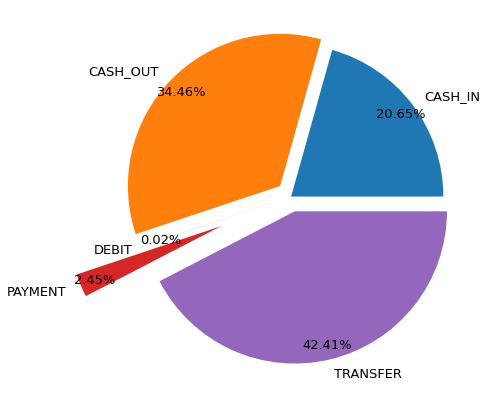

In [11]:
figure(figsize = (7,7))
textprops = {"fontsize":13}
explode = (0.0, 0.1, 0.0, 0.5, 0.1)
plt.pie(type_Vs_amount, labels = ['CASH_IN','CASH_OUT','DEBIT', 'PAYMENT', 'TRANSFER'], 
        autopct = '%1.2f%%', pctdistance = 0.9, textprops = textprops, explode = explode)
plt.show

## ****Conclusion*** :- 
#### ***It is evident from the above pieplot that amount of TRANSFER transaction is most & DEBIT transaction is least***

## ****Finding out type of transaction Vs amount transacted***

In [12]:
type_value_counts = df['type'].value_counts()
type_value_counts_new =type_value_counts.reset_index().rename(columns
                                                             = {'index':"type", "type":"ValueCounts"})
type_value_counts_new

,type,ValueCounts
0,CASH_OUT,2237500
1,PAYMENT,2151495
2,CASH_IN,1399284
3,TRANSFER,532909
4,DEBIT,41432


In [13]:
type_value_counts_new = type_value_counts_new.assign(type_ValueCounts_percentage = 
                                                   lambda x: x['ValueCounts']*100/x['ValueCounts'].sum())
type_value_counts_new


,type,ValueCounts,type_ValueCounts_percentage
0,CASH_OUT,2237500,35.166331
1,PAYMENT,2151495,33.814608
2,CASH_IN,1399284,21.992261
3,TRANSFER,532909,8.375622
4,DEBIT,41432,0.651178


In [14]:
type_Vs_amount = df.groupby('type')['amount'].sum().reset_index()
type_Vs_amount

,type,amount
0,CASH_IN,2.363674e+11
1,CASH_OUT,3.944130e+11
2,DEBIT,2.271992e+08
3,PAYMENT,2.809337e+10
4,TRANSFER,4.852920e+11


In [15]:
type_Vs_amount = type_Vs_amount.assign(type_Vs_amount_percentage = 
                                                   lambda x: x['amount']*100/x['amount'].sum())
type_Vs_amount

,type,amount,type_Vs_amount_percentage
0,CASH_IN,2.363674e+11,20.654391
1,CASH_OUT,3.944130e+11,34.464822
2,DEBIT,2.271992e+08,0.019853
3,PAYMENT,2.809337e+10,2.454871
4,TRANSFER,4.852920e+11,42.406062


In [16]:
df_new = pd.merge(type_value_counts_new, type_Vs_amount, on = 'type')
df_new

,type,ValueCounts,type_ValueCounts_percentage,amount,type_Vs_amount_percentage
0,CASH_OUT,2237500,35.166331,3.944130e+11,34.464822
1,PAYMENT,2151495,33.814608,2.809337e+10,2.454871
2,CASH_IN,1399284,21.992261,2.363674e+11,20.654391
3,TRANSFER,532909,8.375622,4.852920e+11,42.406062
4,DEBIT,41432,0.651178,2.271992e+08,0.019853


<AxesSubplot:xlabel='type'>

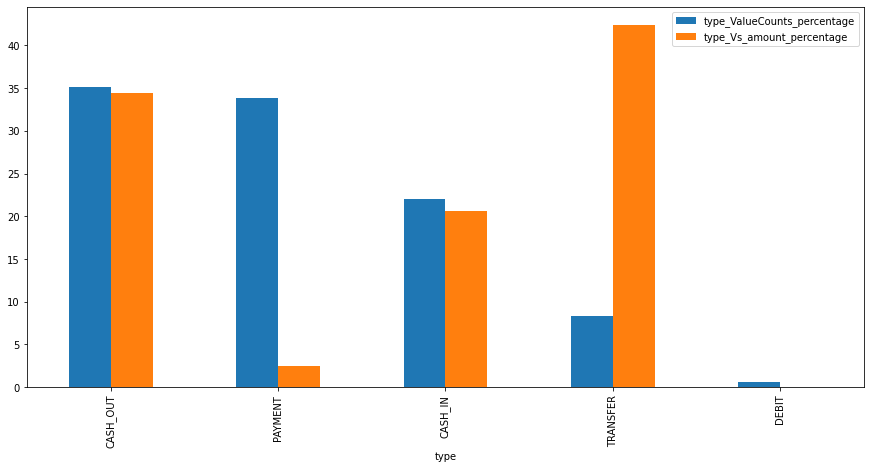

In [17]:
df_new.plot(x= 'type', y = ['type_ValueCounts_percentage','type_Vs_amount_percentage'], kind = 'bar', figsize = (15,7))

## ****Conclusion*** :-
#### ***It is evident from above bar chart that :-***
#### ***PAYMENT mode is used around 34 % of time while AMOUNT transacted through this mode is around 2.5 %***
#### ***TRASFER mode is used around 8 % of time while AMOUNT transacted through this mode is around 42 %***

## ****Converting imbalanced dataset to balanced dataset***

In [18]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['isFraud']==0)] 
df_minority = df[(df['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6354407, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [19]:
# Display new class count
df_upsampled['isFraud'].value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [20]:
df_upsampled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6283817,658,CASH_OUT,619824.64,C989559547,619824.64,0.0,C537664657,1420676.78,2040501.42,1,0
1030533,71,TRANSFER,1871553.73,C677678546,1871553.73,0.0,C646623849,0.00,0.00,1,0
6039793,484,CASH_OUT,156220.74,C389614238,156220.74,0.0,C643171110,0.00,156220.74,1,0
6020336,463,TRANSFER,1968008.53,C1548769886,1968008.53,0.0,C1779956771,0.00,0.00,1,0
6074070,516,CASH_OUT,346293.24,C829436029,346293.24,0.0,C1738520779,750235.55,1096528.80,1,0


## ****Handling categorical features***

In [21]:
df_type = pd.get_dummies(df_upsampled.type, drop_first=True)
df_type.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6283817,1,0,0,0
1030533,0,0,0,1
6039793,1,0,0,0
6020336,0,0,0,1
6074070,1,0,0,0


In [22]:
df_upsampled.drop(columns = 'type', axis = 1 , inplace = True)
df_upsampled.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6283817,658,619824.64,C989559547,619824.64,0.0,C537664657,1420676.78,2040501.42,1,0
1030533,71,1871553.73,C677678546,1871553.73,0.0,C646623849,0.00,0.00,1,0
6039793,484,156220.74,C389614238,156220.74,0.0,C643171110,0.00,156220.74,1,0
6020336,463,1968008.53,C1548769886,1968008.53,0.0,C1779956771,0.00,0.00,1,0
6074070,516,346293.24,C829436029,346293.24,0.0,C1738520779,750235.55,1096528.80,1,0


In [23]:
df_new1 = pd.concat([df_upsampled, df_type], axis = 1,)
df_new1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6283817,658,619824.64,C989559547,619824.64,0.0,C537664657,1420676.78,2040501.42,1,0,1,0,0,0
1030533,71,1871553.73,C677678546,1871553.73,0.0,C646623849,0.00,0.00,1,0,0,0,0,1
6039793,484,156220.74,C389614238,156220.74,0.0,C643171110,0.00,156220.74,1,0,1,0,0,0
6020336,463,1968008.53,C1548769886,1968008.53,0.0,C1779956771,0.00,0.00,1,0,0,0,0,1
6074070,516,346293.24,C829436029,346293.24,0.0,C1738520779,750235.55,1096528.80,1,0,1,0,0,0


In [24]:
df_new1.shape

(12708814, 14)

In [25]:
# Since there is not information for customers that start with M (Merchants). 
# Therefore nameDest that strart with M can not be igored & this feature can not be dropped out.
df_new1['nameDest'] = df_new1['nameDest'].str[0]
df_new1.tail()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362319,718,8634.29,C642813806,518802.0,510167.71,M,0.00,0.00,0,0,0,0,1,0
6362320,718,159188.22,C691808084,3859.0,0.00,C,0.00,159188.22,0,0,1,0,0,0
6362321,718,186273.84,C102120699,168046.0,0.00,C,24893.67,211167.51,0,0,1,0,0,0
6362322,718,82096.45,C614459560,13492.0,0.00,C,0.00,82096.45,0,0,0,0,0,1
6362323,718,1864.24,C49652609,20426.0,18561.76,C,188746.00,190610.24,0,0,0,1,0,0


In [26]:
df_new1['nameDest'] = pd.get_dummies(df_new1.nameDest, drop_first=True)
df_new1.tail()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362319,718,8634.29,C642813806,518802.0,510167.71,1,0.00,0.00,0,0,0,0,1,0
6362320,718,159188.22,C691808084,3859.0,0.00,0,0.00,159188.22,0,0,1,0,0,0
6362321,718,186273.84,C102120699,168046.0,0.00,0,24893.67,211167.51,0,0,1,0,0,0
6362322,718,82096.45,C614459560,13492.0,0.00,0,0.00,82096.45,0,0,0,0,0,1
6362323,718,1864.24,C49652609,20426.0,18561.76,0,188746.00,190610.24,0,0,0,1,0,0


In [27]:
df_new1.drop(columns = 'nameOrig', axis = 1, inplace = True)
df_new1.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362319,718,8634.29,518802.0,510167.71,1,0.00,0.00,0,0,0,0,1,0
6362320,718,159188.22,3859.0,0.00,0,0.00,159188.22,0,0,1,0,0,0
6362321,718,186273.84,168046.0,0.00,0,24893.67,211167.51,0,0,1,0,0,0
6362322,718,82096.45,13492.0,0.00,0,0.00,82096.45,0,0,0,0,0,1
6362323,718,1864.24,20426.0,18561.76,0,188746.00,190610.24,0,0,0,1,0,0


In [28]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12708814 entries, 6283817 to 6362323
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   nameDest        uint8  
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   CASH_OUT        uint8  
 10  DEBIT           uint8  
 11  PAYMENT         uint8  
 12  TRANSFER        uint8  
dtypes: float64(5), int64(3), uint8(5)
memory usage: 933.2 MB


## ****Now checking the correlation of isFraud with different features***

In [29]:
# Checking how strongly isFraud is correlated with other features
df_corr = df_new1.corr()
df_corr['isFraud'].sort_values(ascending = False)

isFraud           1.000000
TRANSFER          0.457381
amount            0.345630
step              0.323963
CASH_OUT          0.151469
oldbalanceOrg     0.125447
isFlaggedFraud    0.031027
newbalanceDest    0.007498
DEBIT            -0.057191
oldbalanceDest   -0.082056
newbalanceOrig   -0.132097
nameDest         -0.451433
PAYMENT          -0.451433
Name: isFraud, dtype: float64

## ****Developing Machine Learning Model***

In [30]:
df_new1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6283817,658,619824.64,619824.64,0.0,0,1420676.78,2040501.42,1,0,1,0,0,0
1030533,71,1871553.73,1871553.73,0.0,0,0.00,0.00,1,0,0,0,0,1
6039793,484,156220.74,156220.74,0.0,0,0.00,156220.74,1,0,1,0,0,0
6020336,463,1968008.53,1968008.53,0.0,0,0.00,0.00,1,0,0,0,0,1
6074070,516,346293.24,346293.24,0.0,0,750235.55,1096528.80,1,0,1,0,0,0


In [31]:
X = df_new1.drop(columns = 'isFraud', axis = 1)
y = df_new1['isFraud']

In [32]:
# train_test_split
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)

In [33]:
# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 25) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)

In [34]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1271820,      88],
       [      0, 1269855]])

In [35]:
# accuracy_score = TP + TN / (TP + FP + TN + FN)
accuracy_score = (1270768 + 1270929) / (1270768 + 66 + 1270929 + 0)
print('accuracy_score = ', accuracy_score)

# precision_score = (TP) / (TP+FP)
precision_score = 1270768 / (1270768 + 66)
print('precision_score = ', precision_score)

# recall_score = (TP) / (TP+FN)
recall_score = 1270768 / (1270768 + 0)
print('recall_score = ', recall_score)

accuracy_score =  0.9999740337710479
precision_score =  0.9999480656010148
recall_score =  1.0


In [36]:
# To compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.999965351575204

> ## ****It is clear from precision_score & f1_score that the develpoed ML Model is performing quite well***